In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bigmac.csv')
df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1.00,2.500000
1,2000-04-01,AUD,Australia,2.59,1.68,1.541667
2,2000-04-01,BRL,Brazil,2.95,1.79,1.648045
3,2000-04-01,CAD,Canada,2.85,1.47,1.938776
4,2000-04-01,CHF,Switzerland,5.90,1.70,3.470588


Préparation et Néttoyage

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1330 non-null   object 
 1   currency_code  1330 non-null   object 
 2   name           1330 non-null   object 
 3   local_price    1330 non-null   float64
 4   dollar_ex      1330 non-null   float64
 5   dollar_price   1330 non-null   float64
dtypes: float64(3), object(3)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

date             0
currency_code    0
name             0
local_price      0
dollar_ex        0
dollar_price     0
dtype: int64

In [5]:
df.isna().sum()

date             0
currency_code    0
name             0
local_price      0
dollar_ex        0
dollar_price     0
dtype: int64

In [6]:
df.dtypes

date              object
currency_code     object
name              object
local_price      float64
dollar_ex        float64
dollar_price     float64
dtype: object

In [7]:
df['date'] = pd.to_datetime(df['date'])
df['currency_code'] = df['currency_code'].astype('category')
df['name'] = df['name'].astype('category')

df.dtypes

date             datetime64[ns]
currency_code          category
name                   category
local_price             float64
dollar_ex               float64
dollar_price            float64
dtype: object

Analyse Exploratoire Univariée

In [8]:
df.describe()

,date,local_price,dollar_ex,dollar_price
count,1330,1.330000e+03,1.330000e+03,1330.000000
mean,2012-03-27 10:36:37.894736896,1.036456e+04,3.943517e+03,3.241729
min,2000-04-01 00:00:00,1.050000e+00,3.025000e-01,0.639966
25%,2007-06-01 00:00:00,7.212500e+00,2.972063e+00,2.331291
50%,2013-01-01 00:00:00,2.400000e+01,7.750475e+00,3.018695
75%,2017-01-01 00:00:00,1.180000e+02,4.688437e+01,4.004793
max,2020-01-14 00:00:00,4.000000e+06,1.600500e+06,8.311708
std,NaN,1.852163e+05,7.073437e+04,1.266159


In [9]:
df[['local_price', 'dollar_price']].describe()

,local_price,dollar_price
count,1.330000e+03,1330.000000
mean,1.036456e+04,3.241729
std,1.852163e+05,1.266159
min,1.050000e+00,0.639966
25%,7.212500e+00,2.331291
50%,2.400000e+01,3.018695
75%,1.180000e+02,4.004793
max,4.000000e+06,8.311708


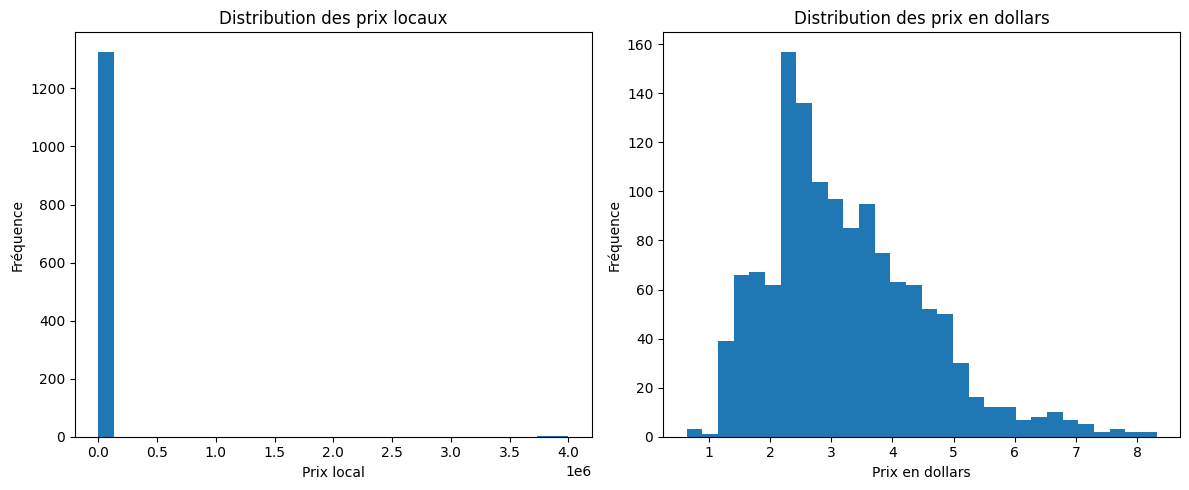

In [10]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['local_price'], bins = 30)
plt.title('Distribution des prix locaux')
plt.xlabel('Prix local')
plt.ylabel('Fréquence')

plt.subplot(1, 2 ,2)
plt.hist(df['dollar_price'], bins = 30)
plt.title('Distribution des prix en dollars')
plt.xlabel('Prix en dollars')
plt.ylabel('Fréquence')

plt.tight_layout()

plt.show()

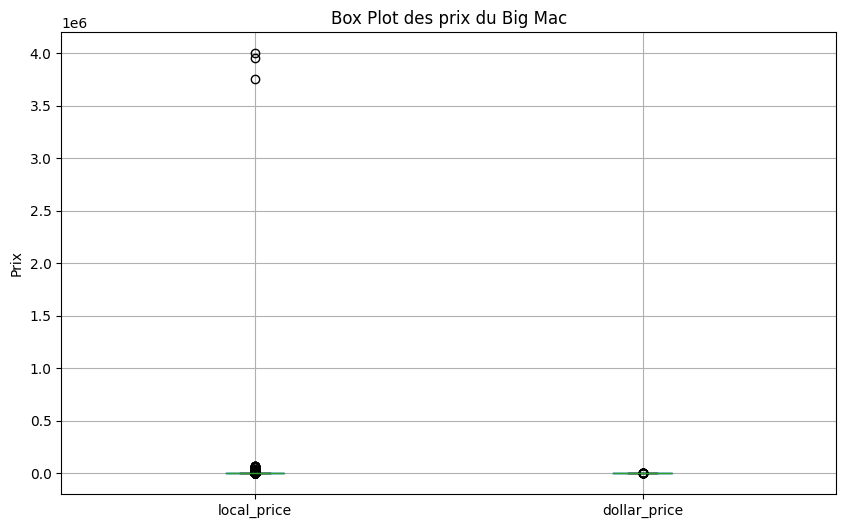

In [11]:
# Créer des box plots
plt.figure(figsize=(10, 6))
df.boxplot(column=['local_price', 'dollar_price'])
plt.title('Box Plot des prix du Big Mac')
plt.ylabel('Prix')
plt.show()

In [12]:
# Trier les prix en dollars par ordre décroissant
prix_eleves = df[['name', 'currency_code', 'dollar_price']].sort_values(by='dollar_price', ascending=False)
# Afficher les 10 premiers
print("Top 10 des pays avec les Big Macs les plus chers (en dollars):")
print(prix_eleves.head(10))

Top 10 des pays avec les Big Macs les plus chers (en dollars):
            name currency_code  dollar_price
537       Norway           NOK      8.311708
517  Switzerland           CHF      8.063016
372       Norway           NOK      7.875333
661       Norway           NOK      7.842279
745       Norway           NOK      7.795435
787       Norway           NOK      7.757827
546       Sweden           SEK      7.639854
810  Switzerland           CHF      7.543666
703       Norway           NOK      7.506405
495       Norway           NOK      7.204323


In [13]:
prix_locaux = df[['name', 'currency_code', 'local_price']].sort_values(by='local_price', ascending=False)
print("Top 10 des pays avec les Big Macs les plus chers (en monnaie locale):")
print(prix_eleves.head(10))

Top 10 des pays avec les Big Macs les plus chers (en monnaie locale):
            name currency_code  dollar_price
537       Norway           NOK      8.311708
517  Switzerland           CHF      8.063016
372       Norway           NOK      7.875333
661       Norway           NOK      7.842279
745       Norway           NOK      7.795435
787       Norway           NOK      7.757827
546       Sweden           SEK      7.639854
810  Switzerland           CHF      7.543666
703       Norway           NOK      7.506405
495       Norway           NOK      7.204323


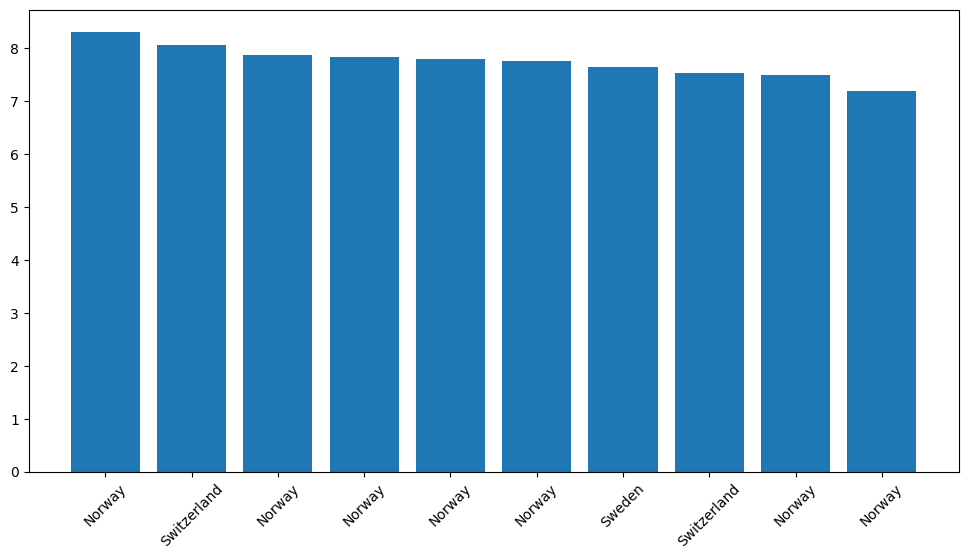

In [14]:
top_10 = prix_eleves.head(10)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_10)), top_10['dollar_price'])
plt.xticks(range(len(top_10)), top_10['name'], rotation=45)

plt.show()

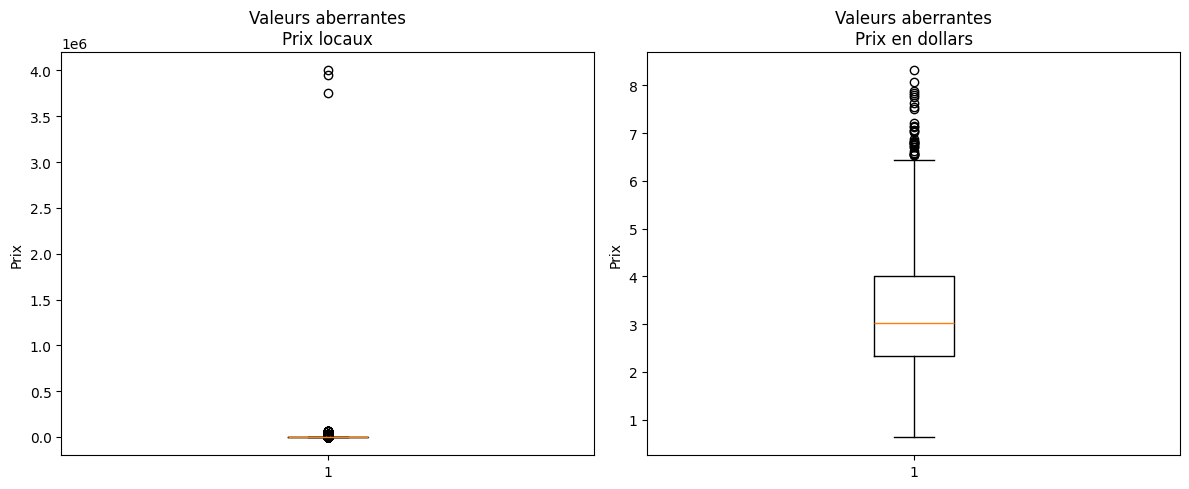

In [17]:
plt.figure(figsize=(12, 5))

# Prix locaux
plt.subplot(1, 2, 1)
plt.boxplot(df['local_price'])
plt.title('Valeurs aberrantes\nPrix locaux')
plt.ylabel('Prix')

# Prix en dollars
plt.subplot(1, 2, 2)
plt.boxplot(df['dollar_price'])
plt.title('Valeurs aberrantes\nPrix en dollars')
plt.ylabel('Prix')

plt.tight_layout()
plt.show()

In [32]:
df.head()

,date,currency_code,name,local_price,dollar_ex,dollar_price
0,2000-04-01,ARS,Argentina,2.50,1.00,2.500000
1,2000-04-01,AUD,Australia,2.59,1.68,1.541667
2,2000-04-01,BRL,Brazil,2.95,1.79,1.648045
3,2000-04-01,CAD,Canada,2.85,1.47,1.938776
4,2000-04-01,CHF,Switzerland,5.90,1.70,3.470588


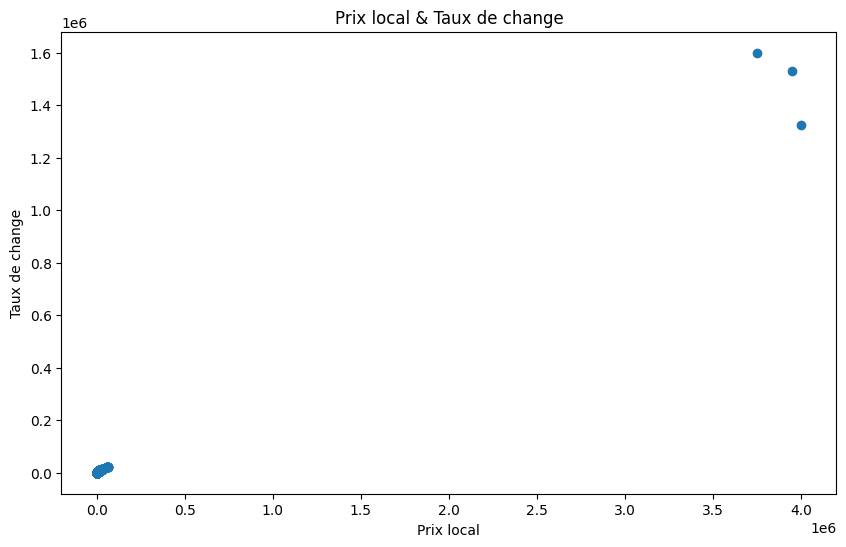

In [43]:
plt.figure(figsize = (10, 6))
plt.scatter(df['local_price'], df['dollar_ex'])
plt.title('Prix local & Taux de change')
plt.xlabel('Prix local')
plt.ylabel('Taux de change')

plt.show()

In [ ]:
print("Corrélation entre le prix en dollars et le taux de change: \n", df['dollar_ex'].corr(df['dollar_price']))

print('\nCorrelation proche de 0 donc Peu ou pas dinfluence entre le prix en dollars et le taux de change')

Corrélation entre le prix en dollars et le taux de change: 
 -0.027032705490921804

Correlation proche de 0 donc Peu ou pas dinfluence entre le prix en dollars et le taux de change


Visualisations

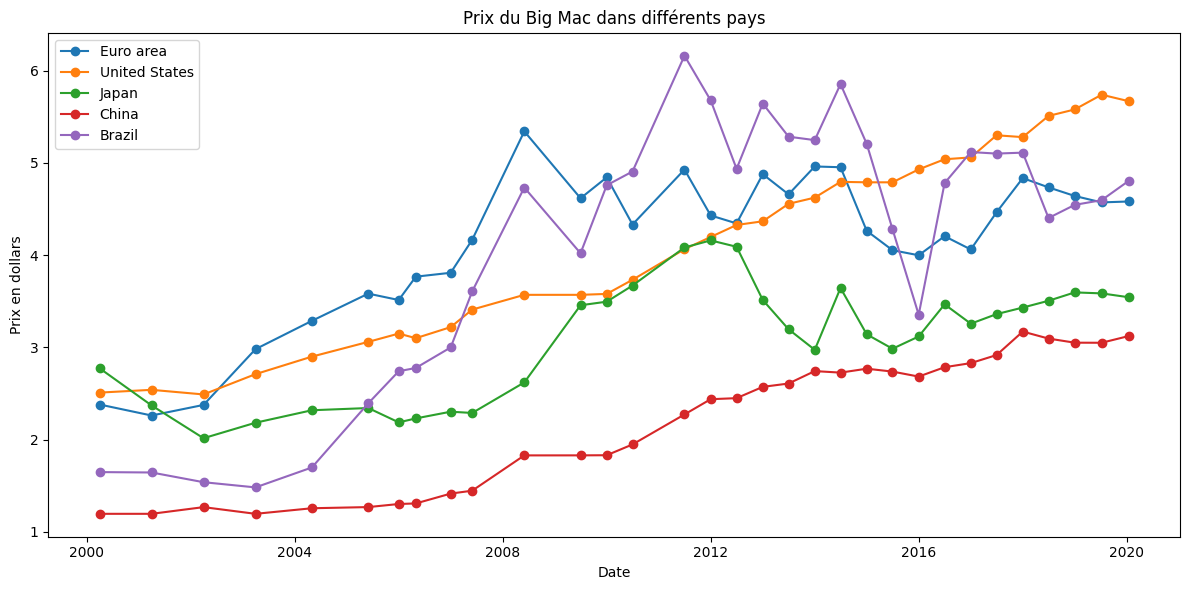

In [87]:
pays_selectionnes = ['Euro area', 'United States', 'Japan', 'China', 'Brazil']

plt.figure(figsize=(12, 6))

for pays in pays_selectionnes:
	data_pays = df[df['name'] == pays]
	plt.plot(data_pays['date'], data_pays['dollar_price'], marker='o', label=pays)

plt.title('Prix du Big Mac dans différents pays')
plt.xlabel('Date')
plt.ylabel('Prix en dollars')
plt.legend()

plt.tight_layout()

plt.show()



C:\Users\HP\AppData\Local\Temp\ipykernel_9920\880140179.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(prix_par_pays, labels=pays_selectionnes)


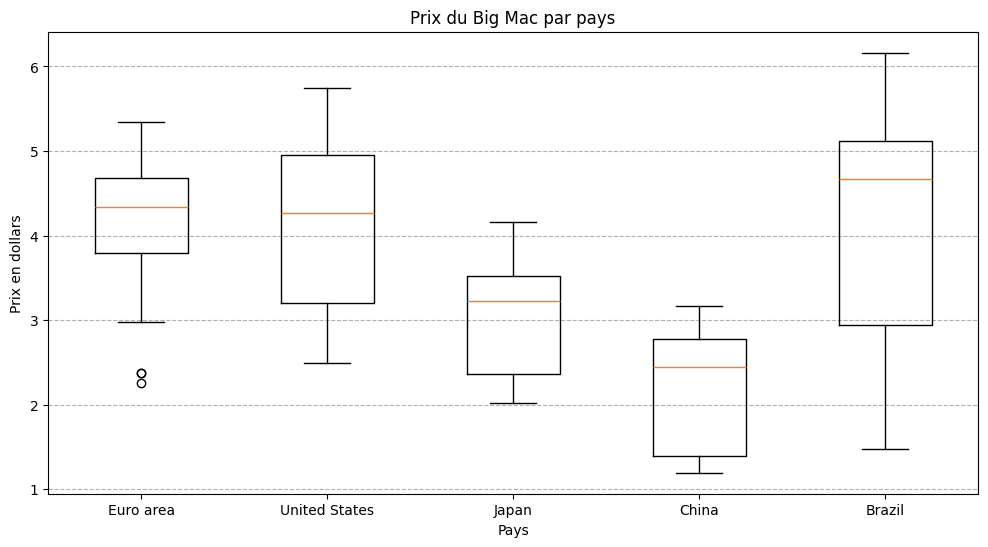

In [93]:
pays_selectionnes = ['Euro area', 'United States', 'Japan', 'China', 'Brazil']

prix_par_pays = [df[df['name'] == pays]['dollar_price'] for pays in pays_selectionnes]

plt.figure(figsize=(12, 6))

plt.boxplot(prix_par_pays, labels=pays_selectionnes)

plt.title('Prix du Big Mac par pays')
plt.ylabel('Prix en dollars')
plt.xlabel('Pays')

plt.grid(axis='y', linestyle='--')

plt.show()

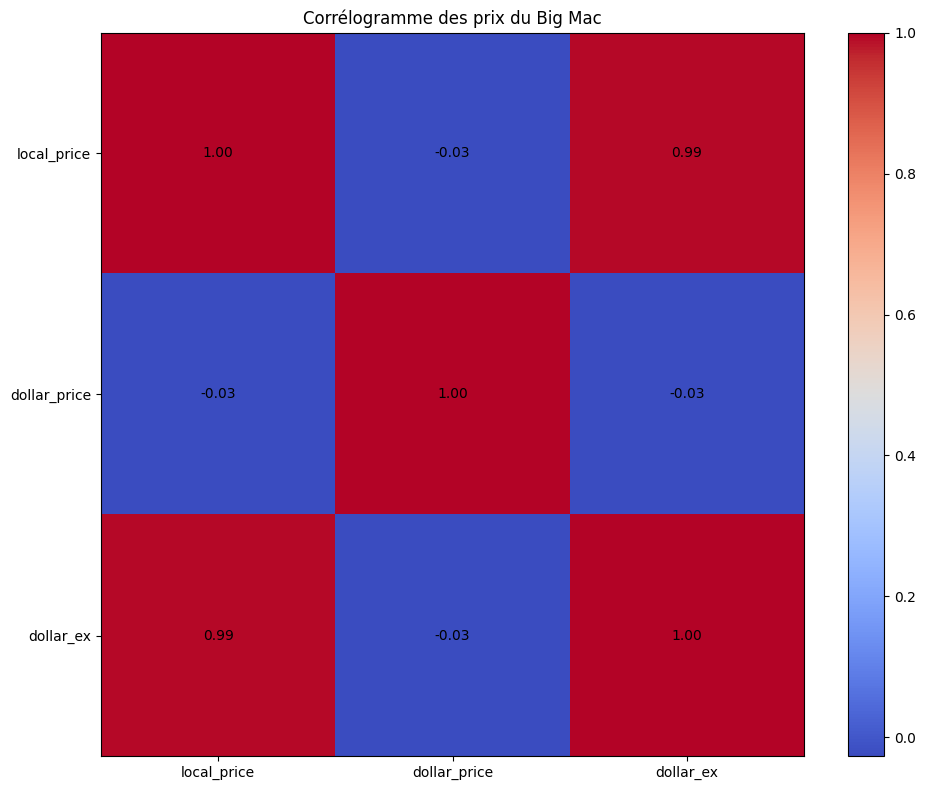

In [100]:
# Sélectionner les colonnes numériques pertinentes
colonnes = ['local_price', 'dollar_price', 'dollar_ex']
correlation_matrix = df[colonnes].corr()

# Créer la figure
plt.figure(figsize=(10, 8))

# Créer le corrélogramme
im = plt.imshow(correlation_matrix, cmap='coolwarm', aspect='auto')

# Ajouter les valeurs dans les cases
for i in range(len(colonnes)):
    for j in range(len(colonnes)):
        text = plt.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                       ha='center', va='center', color='black')

# Personnalisation
plt.colorbar()
plt.xticks(range(len(colonnes)), colonnes)
plt.yticks(range(len(colonnes)), colonnes)
plt.title('Corrélogramme des prix du Big Mac')

plt.tight_layout()
plt.show()

CONCLUSION

🍔 Qu'est-ce que ça nous apprend ?

	-	Les différences de prix
		Un même Big Mac peut coûter 5$ aux États-Unis mais seulement 2$ en Chine
		Cette différence nous montre que le coût de la vie n'est pas le même partout
		Le pouvoir d'achat local

🤔 Ce que ça signifie concrètement
	-	Prix élevé = Pays riche ?	
		Pas forcément !
		Un prix élevé peut aussi indiquer que la monnaie locale est forte

	-	Prix bas = Faible pouvoir d'achat ?
		Pas toujours !
		Les prix sont adaptés au niveau de vie local


McDonald's ajuste ses prix pour que les gens puissent acheter


🌍 parité entre prix local et dollar (explication simple)

	-	Ce qu'il faut comprendre
		Pas de parité parfaite
		Les prix ne sont pas exactement équivalents
		McDonald's adapte ses prix selon le pays
		
	-	Pourquoi ces différences ?
		Coût de la vie local
		Force/faiblesse de la monnaie locale
		Stratégie commerciale de McDonald's

🔍 Analyse des anomalies dans les prix du Big Mac

	-	Prix anormalement élevés
		Certains pays ont des Big Macs beaucoup plus chers que la moyenne
		
	-	Prix anormalement bas
		Certains pays ont des prix étonnamment bas


Ces anomalies nous montrent que le prix du Big Mac peut être un indicateur intéressant des conditions économiques locales !